In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
data=pd.read_csv('wine-clustering.csv')
data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [223]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [224]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [225]:
data.duplicated().sum()

np.int64(0)

In [226]:
skewness=data.skew()
print(skewness)

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64


In [227]:
data.kurtosis()

Alcohol                -0.852500
Malic_Acid              0.299207
Ash                     1.143978
Ash_Alcanity            0.487942
Magnesium               2.104991
Total_Phenols          -0.835627
Flavanoids             -0.880382
Nonflavanoid_Phenols   -0.637191
Proanthocyanins         0.554649
Color_Intensity         0.381522
Hue                    -0.344096
OD280                  -1.086435
Proline                -0.248403
dtype: float64

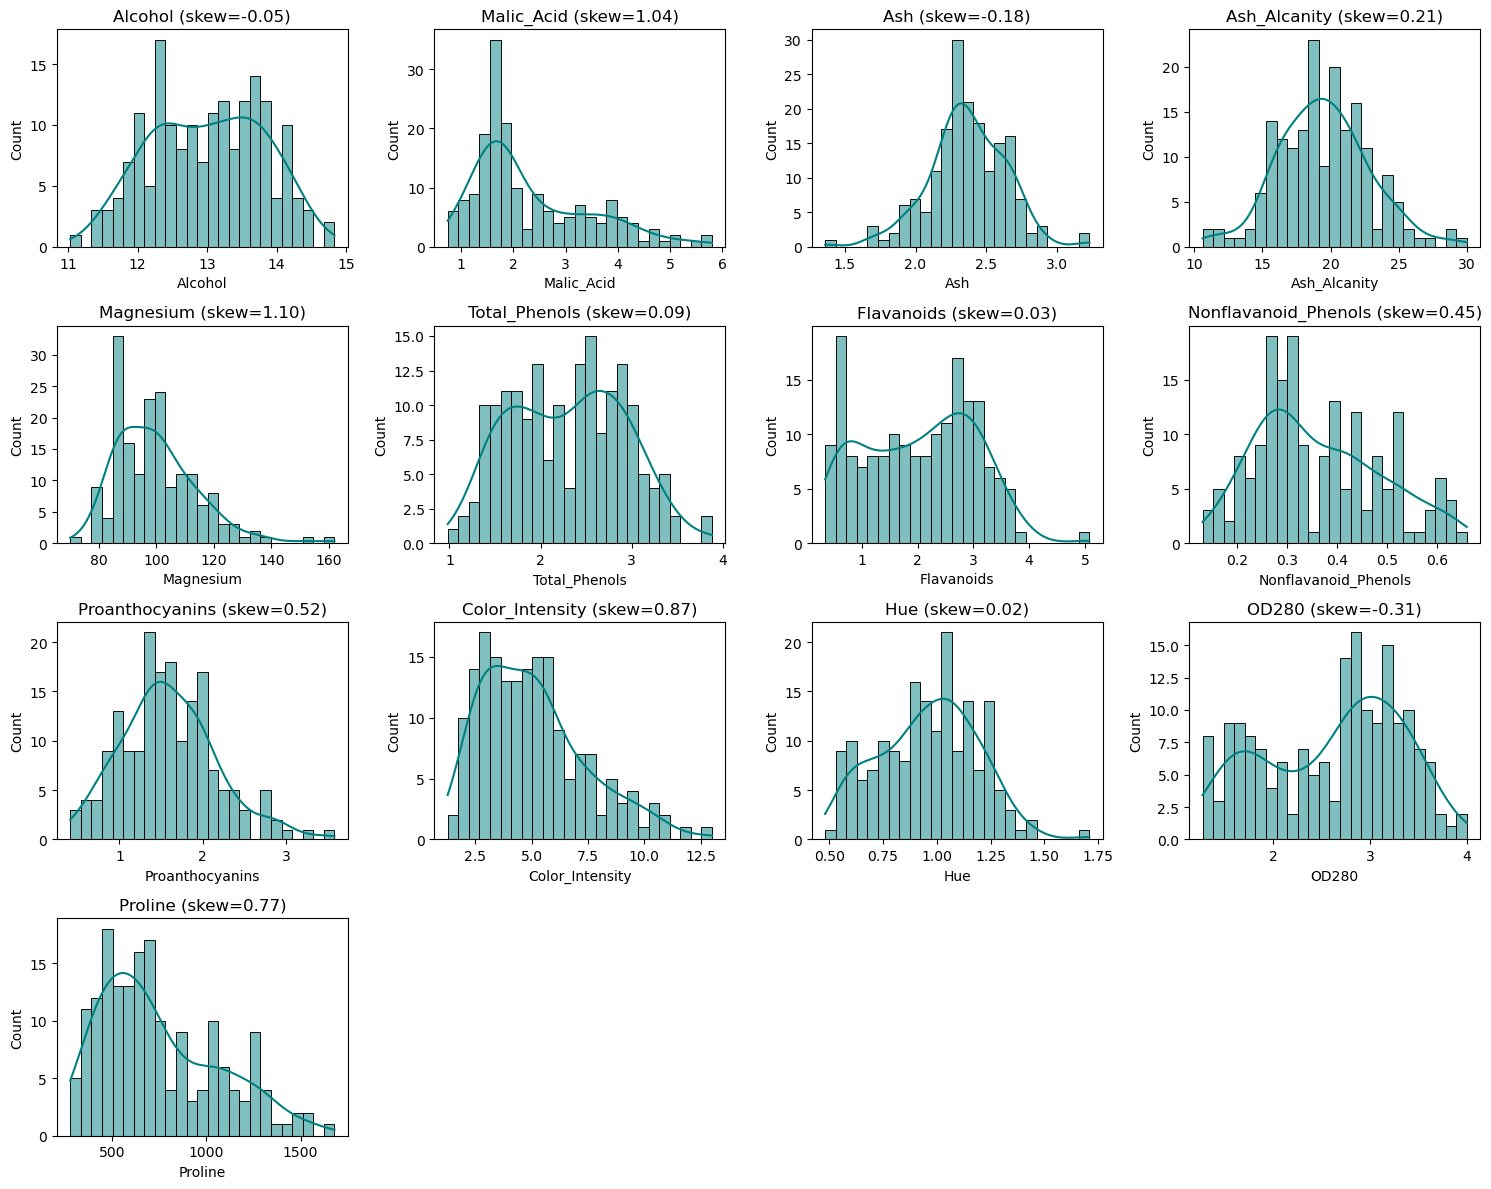

In [228]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)  # adjust grid size as per your columns
    sns.histplot(data[col], kde=True, bins=25, color='teal', edgecolor='black')
    plt.title(f'{col} (skew={data[col].skew():.2f})')

plt.tight_layout()
plt.show()

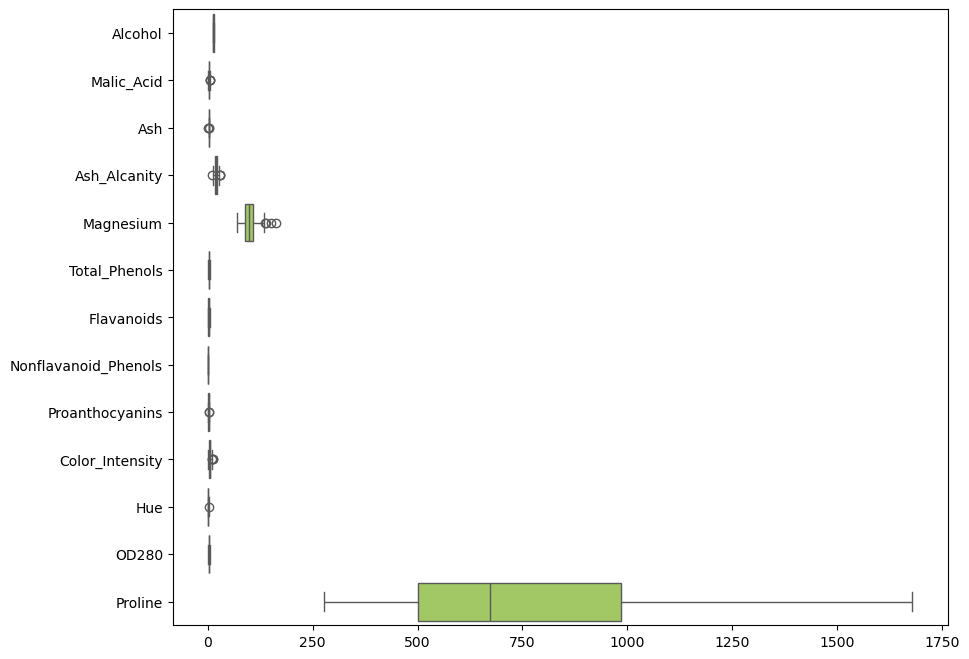

In [229]:
plt.figure(figsize=(10,8))
sns.boxplot(data,orient='h',palette='Set2')
plt.show()

In [230]:
for col in num_cols:
    if skewness[col] > 0.5:  
        if (data[col] >= 0).all():
            data[col] = np.log1p(data[col])
            print(f"Log transform applied to: {col}")
    elif skewness[col] < -0.5:  
        if (data[col] >= 0).all():
            data[col] = np.sqrt(data[col])
            print(f"Square root transform applied to: {col}")
print("Skewness after transformation:\n", data.skew())

Log transform applied to: Malic_Acid
Log transform applied to: Magnesium
Log transform applied to: Proanthocyanins
Log transform applied to: Color_Intensity
Log transform applied to: Proline
Skewness after transformation:
 Alcohol                -0.051482
Malic_Acid              0.529222
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               0.605723
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins        -0.171669
Color_Intensity         0.097222
Hue                     0.021091
OD280                  -0.307285
Proline                 0.087930
dtype: float64


In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scalar=StandardScaler()
X_scaled=pd.DataFrame(scalar.fit_transform(data),columns=data.columns)

In [232]:
X_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.511810,0.232053,-1.169593,1.844269,0.808997,1.034819,-0.659563,1.187333,0.433309,0.362177,1.847920,1.064048
1,0.246290,-0.429201,-0.827996,-2.490847,0.088329,0.568648,0.733629,-0.820719,-0.467341,-0.132203,0.406051,1.113449,1.029761
2,0.196879,0.184609,1.109334,-0.268738,0.161353,0.808997,1.215533,-0.498407,1.849459,0.449450,0.318304,0.788587,1.322143
3,1.691550,-0.236937,0.487926,-0.809251,0.985741,2.491446,1.466525,-0.981875,1.033890,1.190214,-0.427544,1.184071,1.859588
4,0.295700,0.399085,1.840403,0.451946,1.303895,0.808997,0.663351,0.226796,0.491776,-0.162344,0.362177,0.449601,0.167775


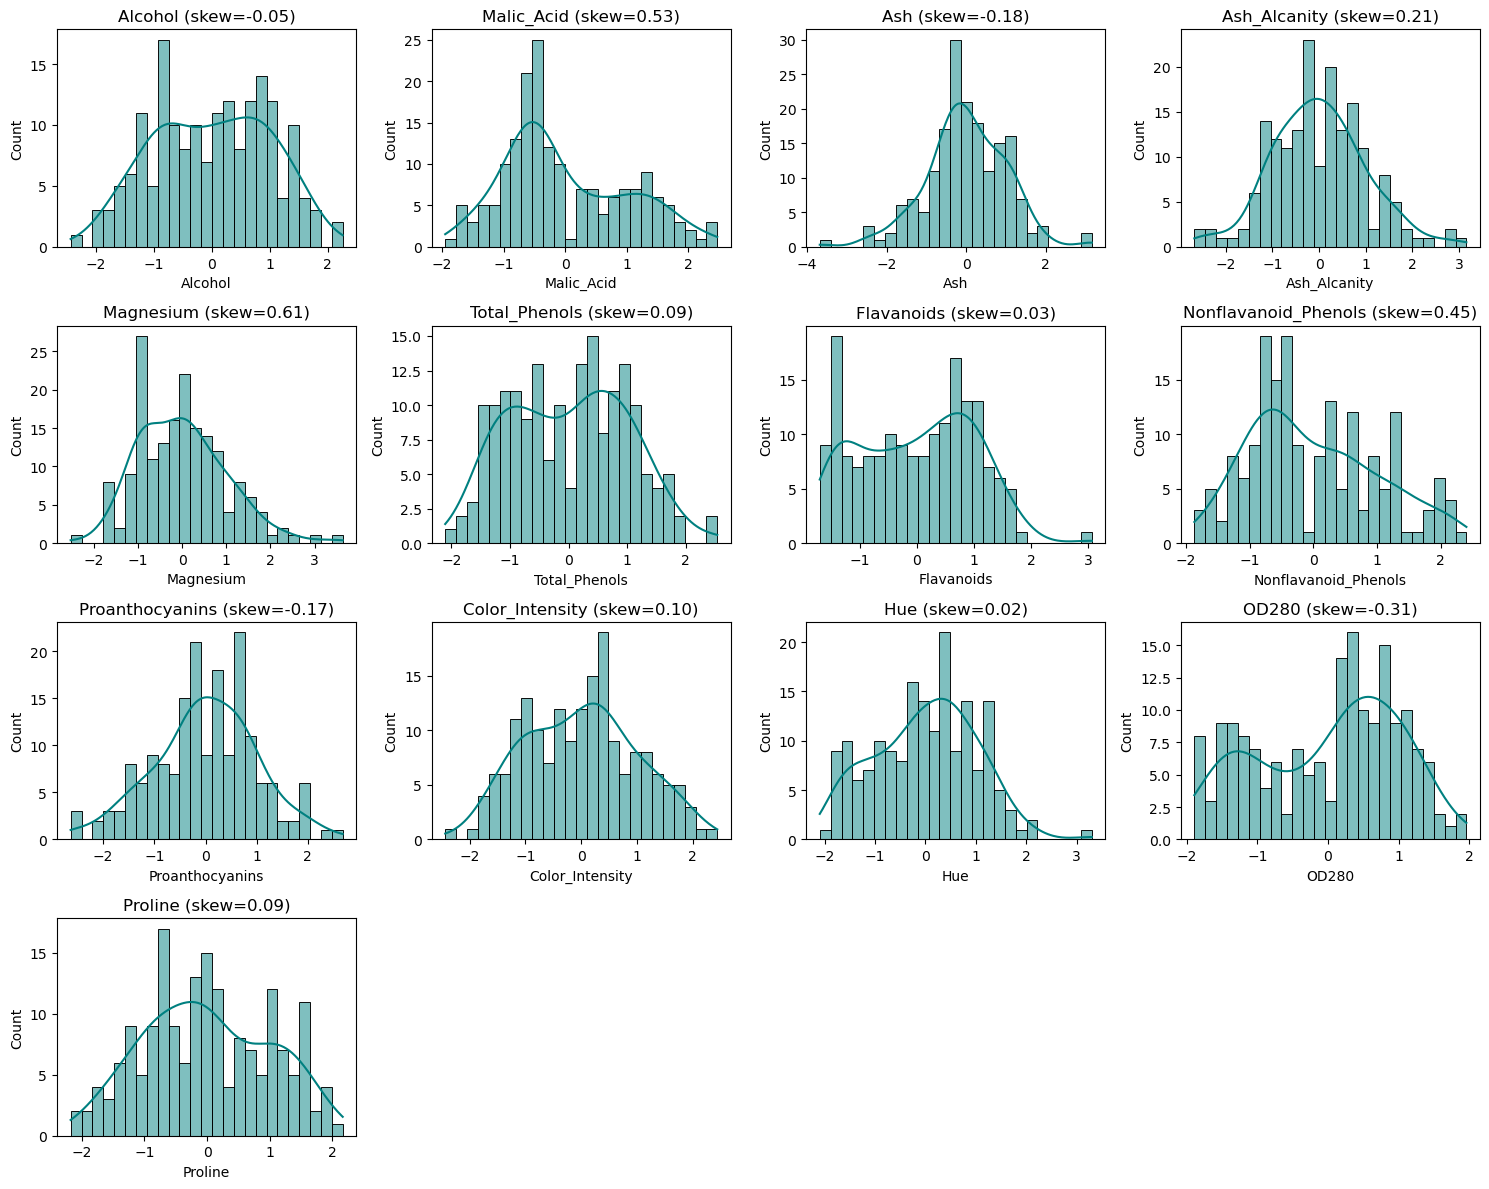

In [233]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)  # Adjust grid size to fit your number of features
    sns.histplot(X_scaled[col], kde=True, bins=25, color='teal', edgecolor='black')
    plt.title(f'{col} (skew={data[col].skew():.2f})')
plt.tight_layout()
plt.show()

In [234]:
from sklearn.metrics import silhouette_score

c:\Users\Nagaprasad M\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Nagaprasad M\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Nagaprasad M\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Nagaprasad M\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

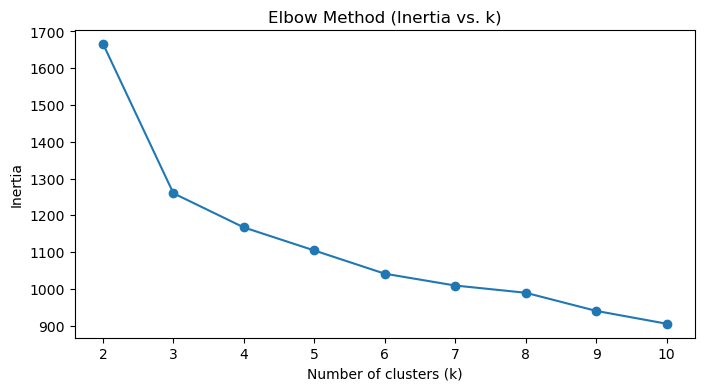

2


In [ ]:
inertias = []
sil_scores = []
k_range = range(2, 11)
best_score = -1
best_k = None
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method (Inertia vs. k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()
iqn=k_range[inertias.index(max(inertias))]
print(iqn)


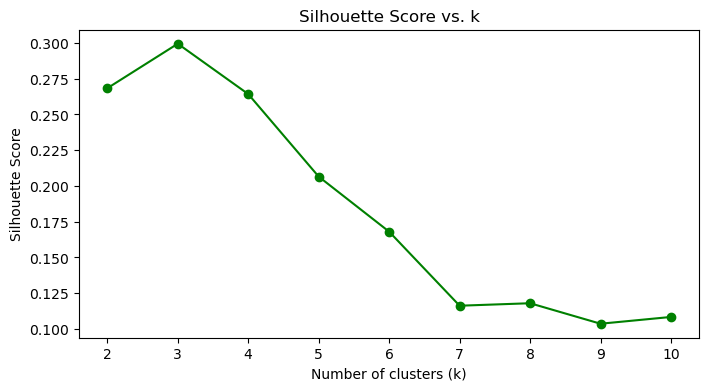

0.2993940311747326
Best number of clusters: 3


In [236]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score vs. k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()
best_k = k_range[sil_scores.index(max(sil_scores))]
print(max(sil_scores))
print(f"Best number of clusters: {best_k}")

In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
data['Cluster_Kmeans'] = cluster_labels
print(data.head())

c:\Users\Nagaprasad M\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   Alcohol  Malic_Acid   Ash  ...  OD280   Proline  Cluster_Kmeans
0    14.23    0.996949  2.43  ...   3.92  6.971669               2
1    13.20    1.022451  2.14  ...   3.40  6.957497               2
2    13.16    1.211941  2.67  ...   3.17  7.078342               2
3    14.37    1.081805  2.50  ...   3.45  7.300473               2
4    13.24    1.278152  2.87  ...   2.93  6.601230               2

[5 rows x 14 columns]


In [238]:
data['Cluster_Kmeans'].value_counts().sort_index(ascending=True)

Cluster_Kmeans
0    63
1    52
2    63
Name: count, dtype: int64

In [239]:
from sklearn.cluster import AgglomerativeClustering

In [240]:
linkages = ['ward', 'complete', 'average', 'single']
n_clusters_options = range(2, 11)
best_score_hie = -1
best_params_hie = {}

for linkage in linkages:
    for n_clusters in n_clusters_options:
        if linkage == 'ward':
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric='euclidean')
        labels = model.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        if score > best_score_hie:
            best_score_hie = score
            best_params_hie = {'linkage': linkage, 'n_clusters': n_clusters}

print("Best silhouette score:", best_score_hie)
print("Best hyperparameters:", best_params_hie)


Best silhouette score: 0.29638469405023526
Best hyperparameters: {'linkage': 'average', 'n_clusters': 6}


In [241]:
hiere=AgglomerativeClustering(n_clusters=6, linkage='average')
hiere_label=hiere.fit_predict(X_scaled)
data['Hier_cluster']=hiere_label
data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_Kmeans,Hier_cluster
0,14.23,0.996949,2.43,15.6,4.852030,2.80,3.06,0.28,1.190888,1.893112,1.04,3.92,6.971669,2,5
1,13.20,1.022451,2.14,11.2,4.615121,2.65,2.76,0.26,0.824175,1.682688,1.05,3.40,6.957497,2,5
2,13.16,1.211941,2.67,18.6,4.624973,2.80,3.24,0.30,1.337629,1.899118,1.03,3.17,7.078342,2,5
3,14.37,1.081805,2.50,16.8,4.736198,3.85,3.49,0.24,1.156881,2.174752,0.86,3.45,7.300473,2,5
4,13.24,1.278152,2.87,21.0,4.779123,2.80,2.69,0.39,1.036737,1.671473,1.04,2.93,6.601230,2,5


In [242]:
data['Hier_cluster'].value_counts().sort_index(ascending=True)

Hier_cluster
0    64
1    49
2     3
3     1
4     3
5    58
Name: count, dtype: int64

Hierarchical Silhouette Score: 0.160


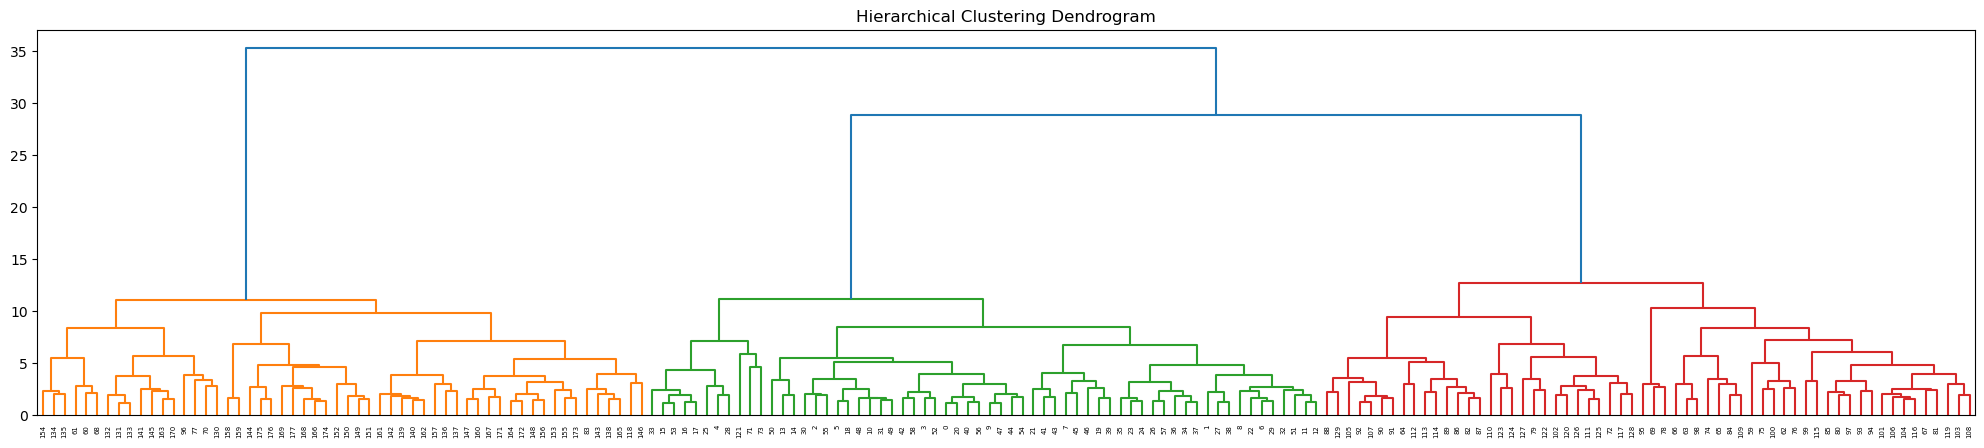

In [250]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

Z = linkage(X_scaled, method='ward')
k = 6
hier_labels = fcluster(Z, t=k, criterion='maxclust')
silhouette_hier = silhouette_score(X_scaled, hier_labels)
print(f"Hierarchical Silhouette Score: {silhouette_hier:.3f}")

plt.figure(figsize=(25, 5))
dendrogram(Z, labels=data.index) 
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [243]:
from sklearn.cluster import DBSCAN

In [244]:
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(3, 10)

best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise

        if n_clusters >= 2:
            if -1 in labels:
                filtered_labels = labels[labels != -1]
                filtered_data = X_scaled[labels != -1]
                score = silhouette_score(filtered_data, filtered_labels)
            else:
                score = silhouette_score(X_scaled, labels)
        else:
            score = -1  # Invalid silhouette score if less than 2 clusters

        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print("Best silhouette score:", best_score)
print("Best params:", best_params)
print(n_clusters)

Best silhouette score: 0.3555021204705034
Best params: {'eps': np.float64(1.4000000000000001), 'min_samples': 3}
0


In [245]:
dbscan=DBSCAN(eps=1.4,min_samples=3)
db_label=dbscan.fit_predict(X_scaled)
data['db_cluster']=db_label
data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_Kmeans,Hier_cluster,db_cluster
0,14.23,0.996949,2.43,15.6,4.852030,2.80,3.06,0.28,1.190888,1.893112,1.04,3.92,6.971669,2,5,1
1,13.20,1.022451,2.14,11.2,4.615121,2.65,2.76,0.26,0.824175,1.682688,1.05,3.40,6.957497,2,5,-1
2,13.16,1.211941,2.67,18.6,4.624973,2.80,3.24,0.30,1.337629,1.899118,1.03,3.17,7.078342,2,5,-1
3,14.37,1.081805,2.50,16.8,4.736198,3.85,3.49,0.24,1.156881,2.174752,0.86,3.45,7.300473,2,5,-1
4,13.24,1.278152,2.87,21.0,4.779123,2.80,2.69,0.39,1.036737,1.671473,1.04,2.93,6.601230,2,5,-1


In [246]:
data['db_cluster'].value_counts().sort_index(ascending=True)

db_cluster
-1    165
 0      6
 1      4
 2      3
Name: count, dtype: int64

In [252]:
from sklearn.decomposition import PCA

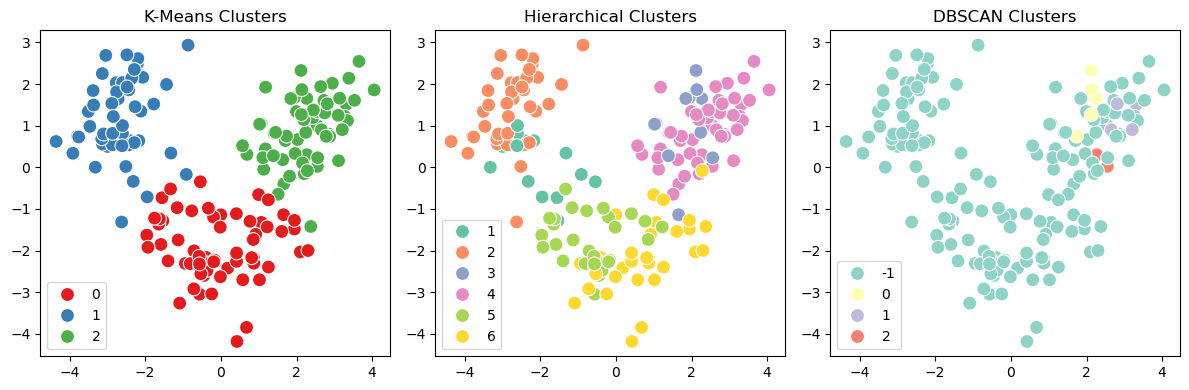

In [253]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=cluster_labels, palette='Set1', s=100)
plt.title("K-Means Clusters")

plt.subplot(1,3,2)
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=hier_labels, palette='Set2', s=100)
plt.title("Hierarchical Clusters")

plt.subplot(1,3,3)
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=db_label, palette='Set3', s=100)
plt.title("DBSCAN Clusters")

plt.tight_layout()
plt.show()